# Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Hospital.csv'

# Load the dataset and name the DataFrame as 'hospital'
hospital = pd.read_csv(file_path)


# Display the first few rows of the dataset
print(hospital.head())


   OrganisationID OrganisationCode OrganisationType   SubType  \
0           17970            NDA07         Hospital  Hospital   
1           17981            NDA18         Hospital  Hospital   
2           18102            NLT02         Hospital  Hospital   
3           18138            NMP01         Hospital  Hospital   
4           18142            NMV01         Hospital  Hospital   

               Sector OrganisationStatus  IsPimsManaged  \
0  Independent Sector            Visible           True   
1  Independent Sector            Visible           True   
2          NHS Sector            Visible           True   
3  Independent Sector            Visible          False   
4  Independent Sector            Visible           True   

                                    OrganisationName  \
0  Walton Community Hospital - Virgin Care Servic...   
1            Woking Community Hospital (Virgin Care)   
2                  North Somerset Community Hospital   
3                             

# Dataset info

In [2]:
# Display dataset structure and metadata
print("\nDataset Information:")
print(hospital.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1210
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrganisationID      1211 non-null   int64  
 1   OrganisationCode    1211 non-null   object 
 2   OrganisationType    1211 non-null   object 
 3   SubType             1211 non-null   object 
 4   Sector              1211 non-null   object 
 5   OrganisationStatus  1211 non-null   object 
 6   IsPimsManaged       1211 non-null   bool   
 7   OrganisationName    1211 non-null   object 
 8   Address1            883 non-null    object 
 9   Address2            727 non-null    object 
 10  Address3            147 non-null    object 
 11  City                1196 non-null   object 
 12  County              973 non-null    object 
 13  Postcode            1210 non-null   object 
 14  Latitude            1209 non-null   float64
 15  Longitude           1209 non-null   fl

# Text Preprocessing Code

In [3]:
import re

# Define a function to clean text
def clean_text(text):
    """
    Cleans the input text by:
    - Removing punctuation and special characters
    - Removing numbers
    - Converting text to lowercase
    - Stripping leading/trailing whitespace
    """
    if isinstance(text, str):  # Ensure input is a string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)      # Remove numbers
        return text.lower().strip()          # Convert to lowercase and strip spaces
    return text

# Apply text cleaning to relevant columns
hospital['cleaned_organisation_name'] = hospital['OrganisationName'].apply(clean_text)
hospital['cleaned_sector'] = hospital['Sector'].apply(clean_text)
hospital['cleaned_organisation_status'] = hospital['OrganisationStatus'].apply(clean_text)

# Preview the cleaned columns
print("\nCleaned Organisation Name:")
print(hospital['cleaned_organisation_name'].head())

print("\nCleaned Sector:")
print(hospital['cleaned_sector'].head())

print("\nCleaned Organisation Status:")
print(hospital['cleaned_organisation_status'].head())



Cleaned Organisation Name:
0    walton community hospital  virgin care service...
1                woking community hospital virgin care
2                    north somerset community hospital
3                                 bridgewater hospital
4                                     kneesworth house
Name: cleaned_organisation_name, dtype: object

Cleaned Sector:
0    independent sector
1    independent sector
2            nhs sector
3    independent sector
4    independent sector
Name: cleaned_sector, dtype: object

Cleaned Organisation Status:
0    visible
1    visible
2    visible
3    visible
4    visible
Name: cleaned_organisation_status, dtype: object


# Topic Modeling

Install Required Libraries

In [4]:
pip install scikit-learn


Import Libraries

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


Topic Modeling

In [6]:
# Use cleaned organisation names for topic modeling
text_data = hospital['cleaned_organisation_name'].dropna()

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=500, stop_words='english')
dtm = vectorizer.fit_transform(text_data)

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [7]:
# Display the topics and their top words
print("\nIdentified Topics:")
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Identified Topics:
Topic #1:
['west', 'north', 'priory', 'house', 'university', 'nuffield', 'health', 'general', 'community', 'hospital']
Topic #2:
['independent', 'war', 'spire', 'queen', 'foundation', 'memorial', 'nhs', 'bmi', 'trust', 'hospital']
Topic #3:
['university', 'cygnet', 'mental', 'care', 'health', 'st', 'community', 'district', 'centre', 'hospital']
Topic #4:
['royal', 'nhs', 'eye', 'london', 'private', 'centre', 'court', 'victoria', 'park', 'hospital']
Topic #5:
['marys', 'bristol', 'county', 'day', 'cygnet', 'unit', 'infirmary', 'royal', 'st', 'hospital']


In [8]:
import matplotlib.pyplot as plt
import numpy as np


Top Words for Each Topic

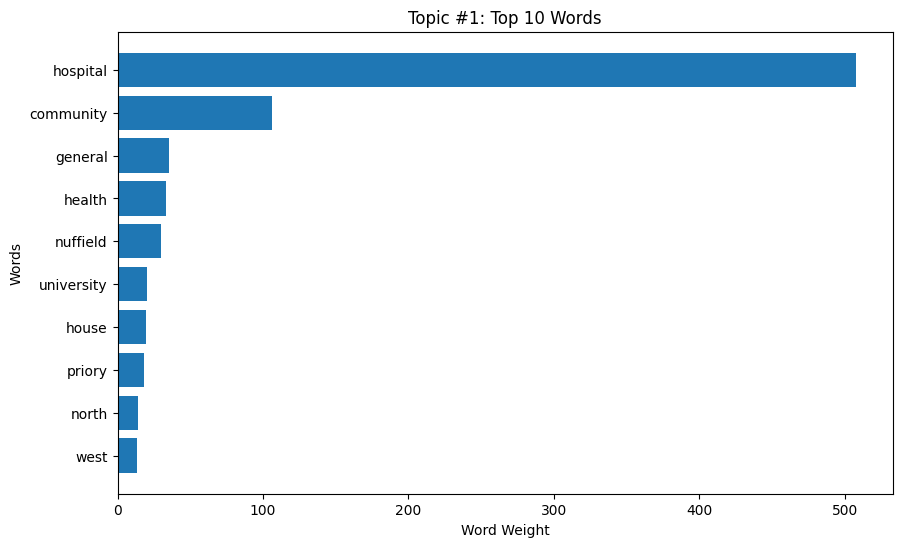

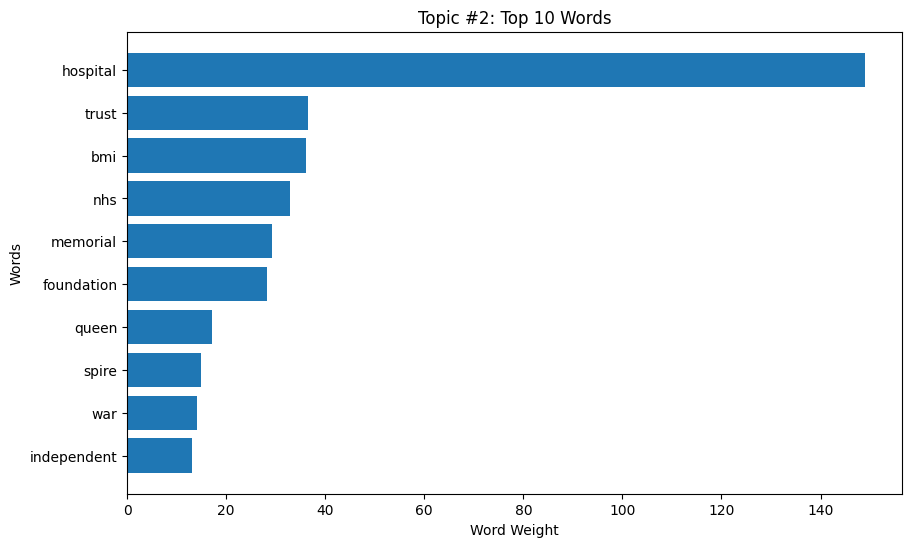

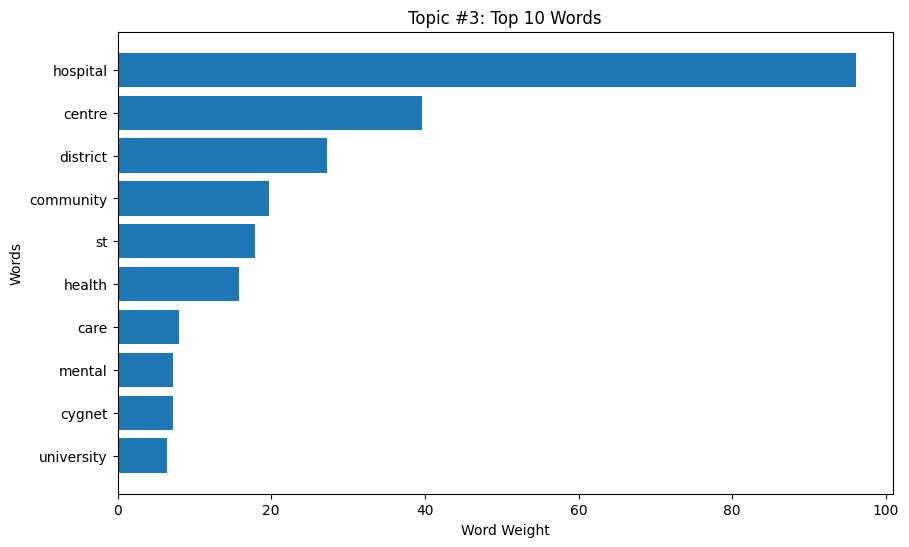

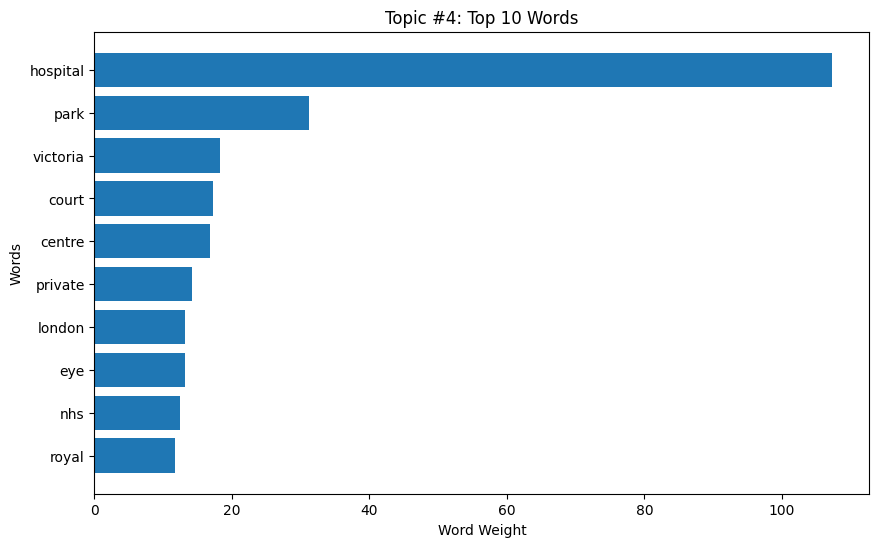

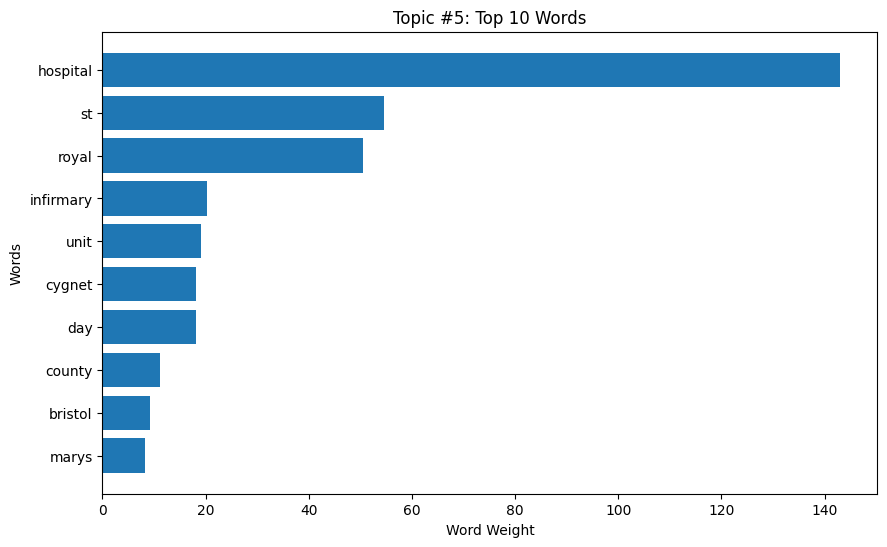

In [9]:
# Define the number of top words to display
top_words = 10

# Get the feature names (words) from the vectorizer
words = vectorizer.get_feature_names_out()

# Plot each topic
for index, topic in enumerate(lda.components_):
    plt.figure(figsize=(10, 6))
    top_word_indices = topic.argsort()[-top_words:]  # Indices of top words
    top_word_values = topic[top_word_indices]       # Weights of top words
    top_word_labels = [words[i] for i in top_word_indices]  # Labels of top words

    plt.barh(top_word_labels, top_word_values, align='center')
    plt.xlabel("Word Weight")
    plt.ylabel("Words")
    plt.title(f"Topic #{index + 1}: Top {top_words} Words")
    plt.show()


# Text Classification

In [10]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Prepare the dataset

In [11]:
# Prepare the dataset
# Use 'cleaned_organisation_name' as features and 'cleaned_sector' as labels
X = hospital['cleaned_organisation_name']
y = hospital['cleaned_sector']

# Check for missing values in X and y and drop them if needed
X = X.dropna()
y = y.loc[X.index]  # Ensure labels match cleaned features

TF-IDF

In [12]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

Split dataset

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


classification model

In [14]:
# Train a classification model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)


In [15]:
# Evaluate the model's performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
                    precision    recall  f1-score   support

independent sector       0.78      0.43      0.55        84
        nhs sector       0.76      0.94      0.84       159

          accuracy                           0.76       243
         macro avg       0.77      0.68      0.70       243
      weighted avg       0.77      0.76      0.74       243


Accuracy Score:
0.7613168724279835


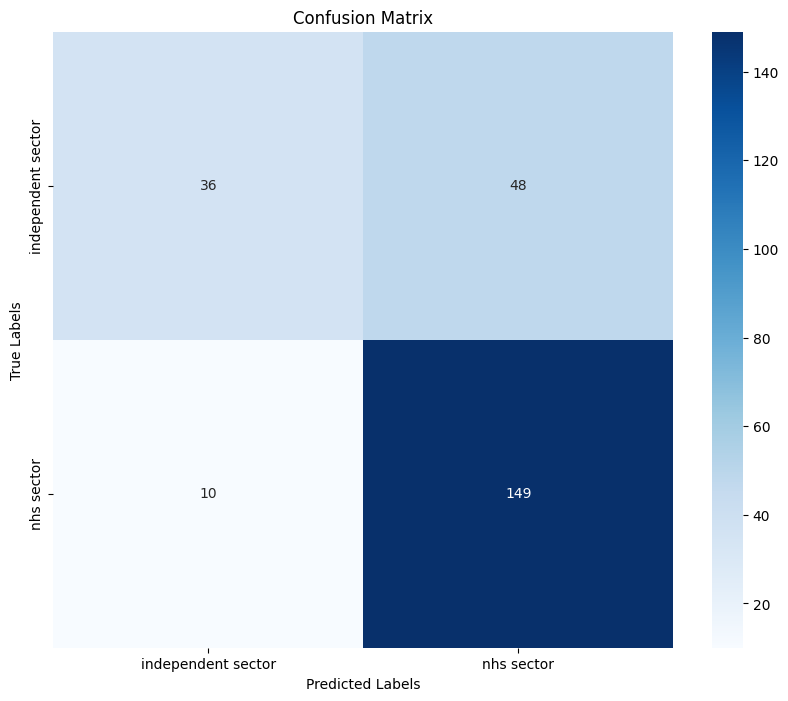

In [16]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


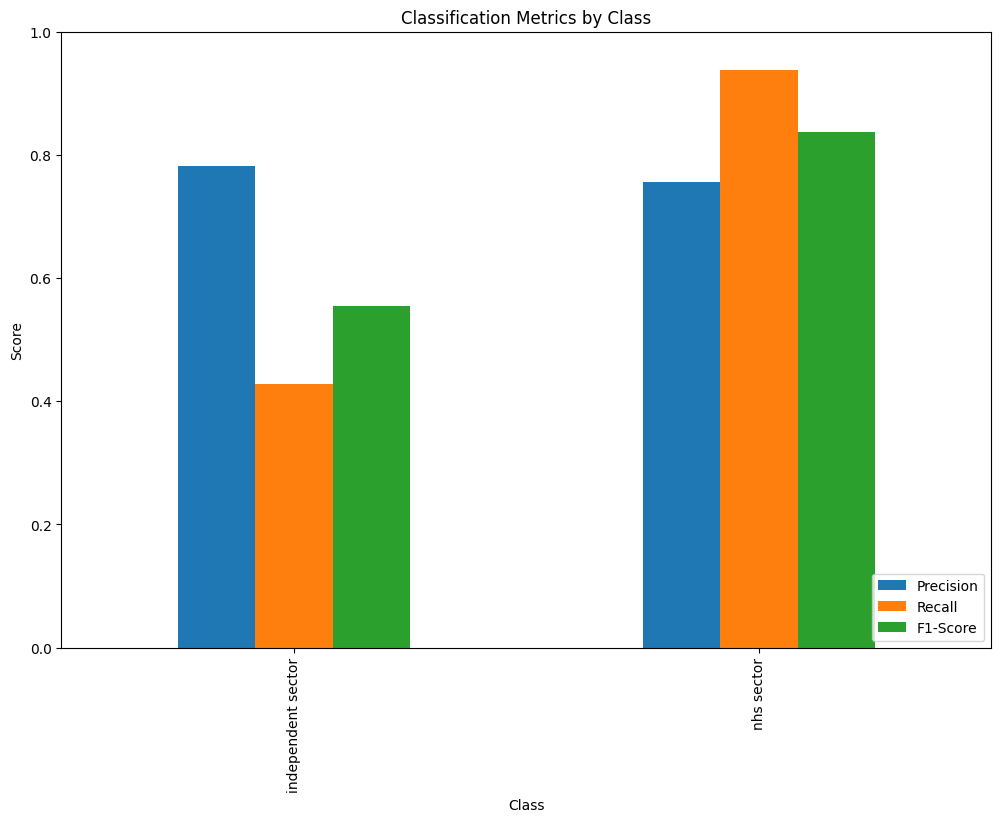

In [17]:
from sklearn.metrics import precision_recall_fscore_support

# Get classification metrics for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=model.classes_)

# Combine into a DataFrame for visualization
import pandas as pd
metrics_df = pd.DataFrame({
    'Class': model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Plot metrics for each class
metrics_df.set_index('Class').plot(kind='bar', figsize=(12, 8))
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.xlabel("Class")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.legend(loc="lower right")
plt.show()


# Plot Distributions of Categories

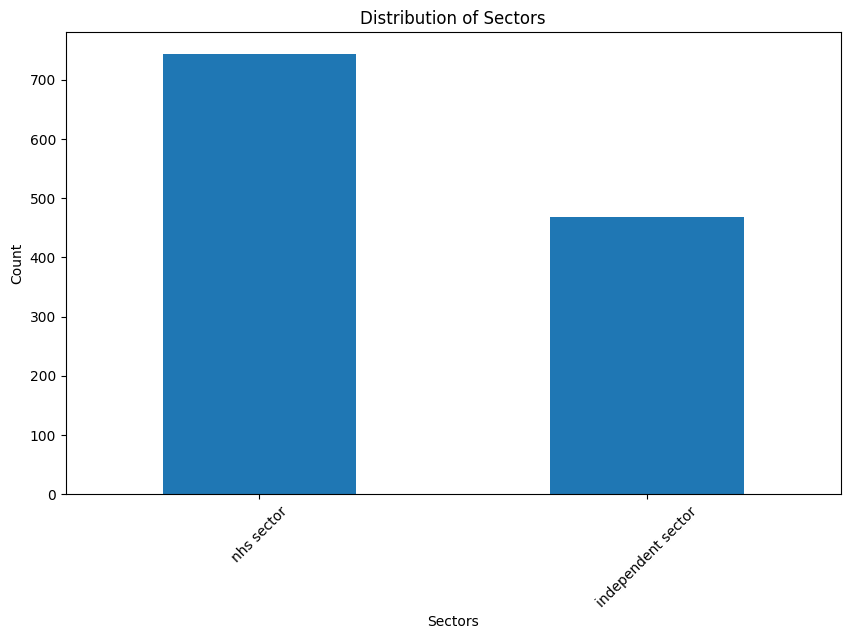

In [18]:
# Plot the distribution of sectors
sector_counts = hospital['cleaned_sector'].value_counts()

plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar')
plt.title('Distribution of Sectors')
plt.xlabel('Sectors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Visualize Topic Distribution

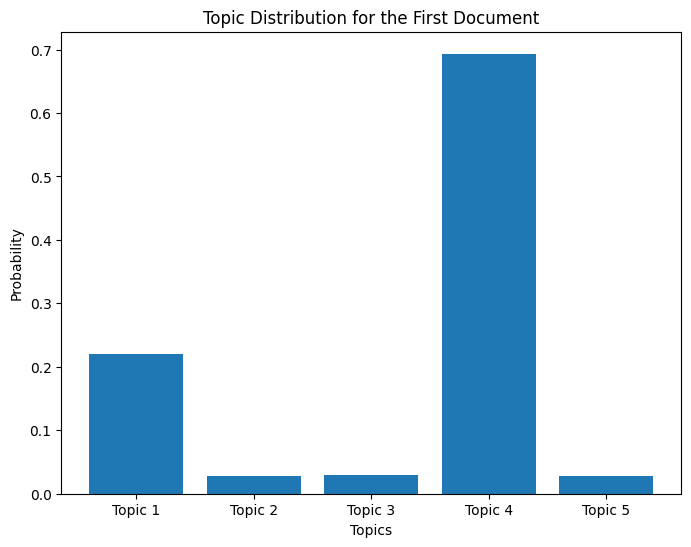

In [19]:
# Get the topic distribution for the first document
sample_topic_distribution = lda.transform(dtm[0])

plt.figure(figsize=(8, 6))
plt.bar(range(len(sample_topic_distribution[0])), sample_topic_distribution[0])
plt.title('Topic Distribution for the First Document')
plt.xlabel('Topics')
plt.ylabel('Probability')
plt.xticks(range(len(sample_topic_distribution[0])), [f'Topic {i+1}' for i in range(len(sample_topic_distribution[0]))])
plt.show()


In [20]:
pip install wordcloud


# All Organisation Names

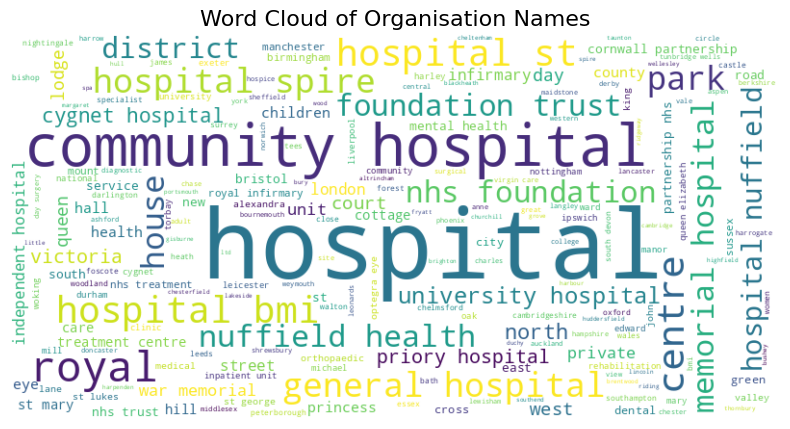

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned organization names into a single string
text_data = ' '.join(hospital['cleaned_organisation_name'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Organisation Names', fontsize=16)
plt.show()


# Word Cloud for a Specific Sector

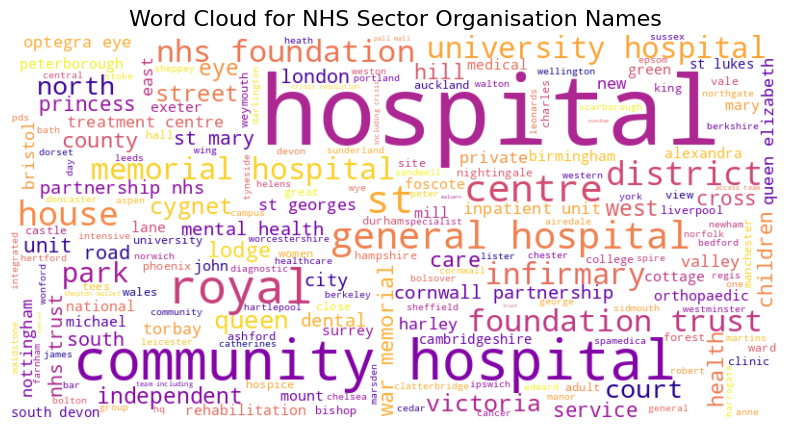

In [22]:
# Filter data for a specific sector ( NHS Sector)
sector_text_data = ' '.join(hospital[hospital['cleaned_sector'] == 'nhs sector']['cleaned_organisation_name'].dropna())

# Generate a word cloud for the specific sector
wordcloud_sector = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(sector_text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sector, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for NHS Sector Organisation Names', fontsize=16)
plt.show()
